# Lecture 3 Sector-coupling

## CODE

### 1)Import Packages

In [31]:
import pypsa
import pandapower as pp
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import warnings
import subprocess
from shapely.errors import ShapelyDeprecationWarning
import logging

warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
logging.getLogger("pypsa.pf").setLevel(logging.WARNING)
plt.rc("figure", figsize=(10, 8))

In [32]:
#os.chdir("C:\Users\82103\Documents\Market Integration and Sector Coupling\pypsa\CASE STUDYexercise_0126")
excel_file_path = "C:\\Users\\82103\\Documents\\Market Integration and Sector Coupling\\pypsa\\CASE STUDY\\data_Germany.xlsx"

### 2)Create a network and set Snapshots

In [33]:
# Create a new PyPSA network
network= pypsa.Network()
network.set_snapshots(range(8760))  # Solve for a year 365*24

### 3)Add Buses

In [34]:
# Read excel file which contains Non renewable generators data
bus_data = pd.read_excel(excel_file_path, sheet_name='buses')

In [35]:
for index,row in bus_data.iterrows():
    network.add(
    "Bus",
    name=row['bus'],
    v_nom=row['v_nom'],
    carrier=row['carrier'],
    x=row['x'],
    y=row['y']
)
    
network.buses

attribute   v_nom type          x          y carrier unit  v_mag_pu_set  \
Bus                                                                       
50Hertz     380.0       13.404954  52.520008      AC                1.0   
Amprion     380.0        6.953101  50.935173      AC                1.0   
Tennet      380.0        9.993682  53.551086      AC                1.0   
TransnetBW  380.0        9.057645  48.521637      AC                1.0   
heat_bus      1.0             NaN        NaN    heat                1.0   

attribute   v_mag_pu_min  v_mag_pu_max control generator sub_network  
Bus                                                                   
50Hertz              0.0           inf      PQ                        
Amprion              0.0           inf      PQ                        
Tennet               0.0           inf      PQ                        
TransnetBW           0.0           inf      PQ                        
heat_bus             0.0           inf      PQ

### 4)Add generators

In [36]:
generators = pd.read_excel(excel_file_path,sheet_name="generators" )

network.madd(
"Generator",
    names= generators.generator,
    bus=list(generators.bus),
    carrier=list(generators.carrier),
    p_nom=list(generators.p_nom),
    #p_nom_max=list(generators.p_nom_A),
    p_nom_extendable=list(generators.p_nom_extandable),
    marginal_cost=list(generators.marginal_cost),
    efficiency=list(generators.efficiency)
    ) 

network.generators

bus  carrier    p_nom  p_nom_extendable  \
Generator                                                            
50_Biomasse            50Hertz  biomass   1910.0              True   
50_Coal                50Hertz     coal   3234.0              True   
50_Lignite             50Hertz  lignite   9762.0              True   
50_Natural gas         50Hertz      gas   5738.0              True   
50_Offshore Wind       50Hertz     wind   1068.0              True   
50_Onshore Wind        50Hertz     wind  18809.0              True   
50_Pumped storage      50Hertz    hydro   2793.0              True   
50_Solar               50Hertz    solar  12705.0              True   
A_Biomasse             Amprion  biomass   1507.0              True   
A_Coal                 Amprion     coal   7702.0              True   
A_Lignite              Amprion  lignite  10915.0              True   
A_Natural gas          Amprion      gas  14824.0              True   
A_Onshore Wind         Amprion     wind  10554.0              True   
A_Pumped storage       Amprion    hydro   1594.0              True   
A_Solar                Amprion    solar  11067.0              True   
TBW_Biomasse        TransnetBW  biomass    926.0              True   
TBW_Coal            TransnetBW     coal   5331.0              True   
TBW_Lignite         TransnetBW  lignite   1167.0              True   
TBW_Natural gas     TransnetBW      gas   1414.0              True   
TBW_Onshore Wind    TransnetBW     wind   1650.0              True   
TBW_Pumped storage  TransnetBW    hydro   3360.0              True   
TBW_Solar           TransnetBW    solar   6532.0              True   
Ten_Biomasse            Tennet  biomass   3644.0              True   
Ten_Coal                Tennet     coal   5331.0              True   
Ten_Lignite             Tennet  lignite    390.0              True   
Ten_Natural gas         Tennet      gas   1414.0              True   
Ten_Offshore Wind       Tennet     wind   6436.0              True   
Ten_Onshore Wind        Tennet     wind  22172.0              True   
Ten_Pumped storage      Tennet    hydro   3360.0              True   
Ten_Solar               Tennet    solar   6532.0              True   

                    marginal_cost  efficiency control type  p_nom_mod  \
Generator                                                               
50_Biomasse                75.000        0.40      PQ             0.0   
50_Coal                    34.000        0.30      PQ             0.0   
50_Lignite                 32.000        0.40      PQ             0.0   
50_Natural gas             37.000        0.40      PQ             0.0   
50_Offshore Wind            0.000        1.00      PQ             0.0   
50_Onshore Wind             0.000        1.00      PQ             0.0   
50_Pumped storage           3.000        0.95      PQ             0.0   
50_Solar                    0.000        1.00      PQ             0.0   
A_Biomasse                 75.000        0.40      PQ             0.0   
A_Coal                     33.708        0.30      PQ             0.0   
A_Lignite                  31.960        0.40      PQ             0.0   
A_Natural gas              36.568        0.40      PQ             0.0   
A_Onshore Wind              0.000        1.00      PQ             0.0   
A_Pumped storage            3.000        0.95      PQ             0.0   
A_Solar                     0.000        1.00      PQ             0.0   
TBW_Biomasse               74.520        0.40      PQ             0.0   
TBW_Coal                   33.708        0.30      PQ             0.0   
TBW_Lignite                31.960        0.40      PQ             0.0   
TBW_Natural gas            36.568        0.40      PQ             0.0   
TBW_Onshore Wind            0.000        1.00      PQ             0.0   
TBW_Pumped storage          3.000        0.95      PQ             0.0   
TBW_Solar                   0.000        1.00      PQ             0.0   
Ten_Biomasse               74.520 

In [37]:
PV_timeseries=pd.read_excel(excel_file_path,sheet_name='PV_timeseries')
wind_timeseries=pd.read_excel(excel_file_path,sheet_name='wind_timeseries')

In [38]:
network.generators_t.p_max_pu["50_Solar"] = list(PV_timeseries.p_nom_pu_solar_50Hertz)
network.generators_t.p_max_pu["50_Offshore Wind"] = list(wind_timeseries.p_nom_pu_offshore_50Hertz)
network.generators_t.p_max_pu["50_Onshore Wind"] = list(wind_timeseries.p_nom_pu_onshore_50Hertz)

network.generators_t.p_max_pu["A_Solar"] = list(PV_timeseries.p_nom_pu_solar_Amprion)
network.generators_t.p_max_pu["A_Onshore Wind"] = list(wind_timeseries.p_nom_pu_Amprion)

network.generators_t.p_max_pu["TBW_Solar"] = list(PV_timeseries.p_nom_pu_TransnetBW)
network.generators_t.p_max_pu["TBW_Onshore Wind"] = list(wind_timeseries.p_nom_pu_TransnetBW)

network.generators_t.p_max_pu["Ten_Solar"] = list(PV_timeseries.p_nom_pu_solar_Tennet)
network.generators_t.p_max_pu["Ten_Offshore Wind"] = list(wind_timeseries.p_nom_pu_offshore_Tennet)
network.generators_t.p_max_pu["Ten_Onshore Wind"] = list(wind_timeseries.p_nom_pu_onshore_Tennet)

### 5)Add load

### Added by Parag

In [ ]:
'''
You can add your all loads in a timeseries in columns and add load using network.add function like mentioned in the following code:
To verify whether the timeseries of the load data (p_set) is added properly, use:  `network.loads_t.p_set`  this command
'''

"""
# Read excel file which contains Non renewable generators data
def add_consumers(filename, index_col):
    try:
        load = pd.read_(filename,index_col=index_col)
    except pd.errors.EmptyDataError:
        print("The CSV file is empty.")
        return

    for load_name in list(load.columns.unique()):
        network.add("Load",
        f"{load_name}",
        bus=load_name,
        p_set=load[load_name].tolist()
        )

    return network.loads_t.p_set.head(5)    
"""

In [40]:
demand = pd.read_excel(excel_file_path,sheet_name="load_hourly" )
network.add("Load", "Amprion", bus="Amprion", p_set=demand["Amprion"])
network.add("Load", "Tennet", bus="Tennet", p_set=demand["TenneT"])
network.add("Load", "TransnetBW", bus="TransnetBW", p_set=demand["TransnetBW"])
network.add("Load", "50Hertz", bus="50Hertz", p_set=demand["50Hertz"])

<Axes: xlabel='snapshot', ylabel='MW'>

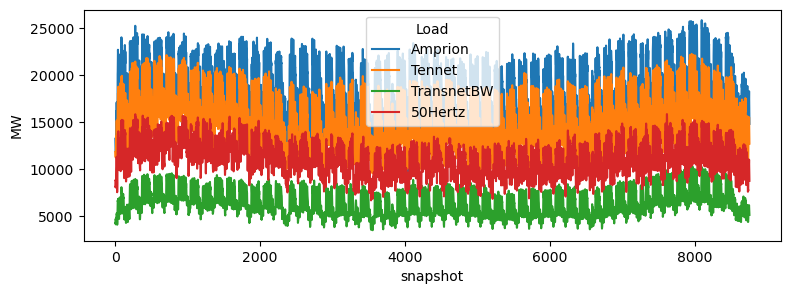

In [41]:
network.loads_t.p_set.plot(figsize=(9,3), ylabel="MW")

### 6)Add Lines

In [42]:
lines=pd.read_excel(excel_file_path,sheet_name='lines',header=0)
lines.head()

name        bus0        bus1  s_nom  efficiency  s_nom_extendable
0     0     50Hertz      Tennet   1700           1             False
1     1     Amprion      Tennet   1700           1             False
2     2      Tennet  TransnetBW   1700           1             False
3     3  TransnetBW     Amprion   1700           1             False

In [43]:
for X, row in lines.iterrows():
    network.add("Line",
    name=row['name'],
    bus0=row['bus0'],
    bus1=row['bus1'],
    s_nom=row['s_nom'],
    x=row['efficiency'],
    s_nom_extendable=row['s_nom_extendable'] 
    )
network.lines

attribute        bus0        bus1 type    x    r    g    b   s_nom  s_nom_mod  \
Line                                                                            
0             50Hertz      Tennet       1.0  0.0  0.0  0.0  1700.0        0.0   
1             Amprion      Tennet       1.0  0.0  0.0  0.0  1700.0        0.0   
2              Tennet  TransnetBW       1.0  0.0  0.0  0.0  1700.0        0.0   
3          TransnetBW     Amprion       1.0  0.0  0.0  0.0  1700.0        0.0   

attribute  s_nom_extendable  s_nom_min  s_nom_max  s_max_pu  capital_cost  \
Line                                                                        
0                     False        0.0        inf       1.0           0.0   
1                     False        0.0        inf       1.0           0.0   
2                     False        0.0        inf       1.0           0.0   
3                     False        0.0        inf       1.0           0.0   

attribute  build_year  lifetime  length carrier  terrain_factor  num_parallel  \
Line                                                                            
0                   0       inf     0.0                     1.0           1.0   
1                   0       inf     0.0                     1.0           1.0   
2                   0       inf     0.0                     1.0           1.0   
3                   0       inf     0.0                     1.0           1.0   

attribute  v_ang_min  v_ang_max sub_network  x_pu  r_pu  g_pu  b_pu  x_pu_eff  \
Line                                                                            
0               -inf        inf               0.0   0.0   0.0   0.0       0.0   
1               -inf        inf               0.0   0.0   0.0   0.0       0.0   
2               -inf        inf               0.0   0.0   0.0   0.0       0.0   
3               -inf        inf               0.0   0.0   0.0   0.0       0.0   

attribute  r_pu_eff  s_nom_opt  
Line                            
0               0.0        0.0  
1               0.0        0.0  
2               0.0        0.0  
3               0.0        0.0

### 7)Add links

In [44]:
links = pd.read_excel(excel_file_path, sheet_name='links')
links.head()

name        bus0      bus1  p_nom  p_nom_A  p_nom_B  p_nom_C  \
0  TBW_heat  TransnetBW  heat_bus     50    200.0    800.0   1500.0   
1    T_heat      Tennet  heat_bus    900   1500.0   3700.0   5700.0   
2   50_heat     50Hertz  heat_bus    200    600.0   2200.0   4200.0   
3    A_heat     Amprion  heat_bus      0      0.0   2400.0   4700.0   

   p_nom_extendable  efficiency  capital_cost  
0              True         2.5          1000  
1              True         2.5          1000  
2              True         2.5          1000  
3              True         2.5          1000

In [45]:
for X, row in links.iterrows():
    network.add("Link",
    name=row['name'],
    bus0=row['bus0'],
    bus1=row['bus1'],
    #bus2=row['bus2'],
    p_nom=row['p_nom'],
    p_nom_extendable=row['p_nom_extendable'],
    efficiency=row['efficiency'],
    #efficiency2=row['efficiency2'],
    capital_cost=row['capital_cost'] )
network.links

attribute        bus0      bus1 type carrier  efficiency  build_year  \
Link                                                                   
TBW_heat   TransnetBW  heat_bus                      2.5           0   
T_heat         Tennet  heat_bus                      2.5           0   
50_heat       50Hertz  heat_bus                      2.5           0   
A_heat        Amprion  heat_bus                      2.5           0   

attribute  lifetime  p_nom  p_nom_mod  p_nom_extendable  p_nom_min  p_nom_max  \
Link                                                                            
TBW_heat        inf   50.0        0.0              True        0.0        inf   
T_heat          inf  900.0        0.0              True        0.0        inf   
50_heat         inf  200.0        0.0              True        0.0        inf   
A_heat          inf    0.0        0.0              True        0.0        inf   

attribute  p_set  p_min_pu  p_max_pu  capital_cost  marginal_cost  \
Link                                                                
TBW_heat     0.0       0.0       1.0        1000.0            0.0   
T_heat       0.0       0.0       1.0        1000.0            0.0   
50_heat      0.0       0.0       1.0        1000.0            0.0   
A_heat       0.0       0.0       1.0        1000.0            0.0   

attribute  marginal_cost_quadratic  stand_by_cost  length  terrain_factor  \
Link                                                                        
TBW_heat                       0.0            0.0     0.0             1.0   
T_heat                         0.0            0.0     0.0             1.0   
50_heat                        0.0            0.0     0.0             1.0   
A_heat                         0.0            0.0     0.0             1.0   

attribute  committable  start_up_cost  shut_down_cost  min_up_time  \
Link                                                                 
TBW_heat         False            0.0             0.0            0   
T_heat           False            0.0             0.0            0   
50_heat          False            0.0             0.0            0   
A_heat           False            0.0             0.0            0   

attribute  min_down_time  up_time_before  down_time_before  ramp_limit_up  \
Link                                                                        
TBW_heat               0               1                 0            NaN   
T_heat                 0               1                 0            NaN   
50_heat                0               1                 0            NaN   
A_heat                 0               1                 0            NaN   

attribute  ramp_limit_down  ramp_limit_start_up  ramp_limit_shut_down  \
Link                                                                    
TBW_heat               NaN                  1.0                   1.0   
T_heat                 NaN                  1.0                   1.0   
50_heat                NaN                  1.0                   1.0   
A_heat                 NaN                  1.0                   1.0   

attribute  p_nom_opt  
Link                  
TBW_heat         0.0  
T_heat           0.0  
50_heat          0.0  
A_heat           0.0

### 8)Add carriers

In [46]:
Carriers = pd.read_excel(excel_file_path,sheet_name="co2_emissions" )
Carriers.tail()

name  co2_emissions
2  lignite          0.364
3     wind          0.000
4    hydro          0.000
5    solar          0.000
6  biomass          0.000

In [47]:
for X, row in Carriers.iterrows():
    network.add(
        "Carrier",
        name=row['name'],
        co2_emissions=row['co2_emissions']
    )
network.carriers

attribute  co2_emissions color nice_name  max_growth  max_relative_growth
Carrier                                                                  
coal               0.354                         inf                  0.0
gas                0.202                         inf                  0.0
lignite            0.364                         inf                  0.0
wind               0.000                         inf                  0.0
hydro              0.000                         inf                  0.0
solar              0.000                         inf                  0.0
biomass            0.000                         inf                  0.0

## RESULTS

### 1)Optimize

In [48]:
network.optimize()

Index(['0', '1', '2', '3'], dtype='object', name='Line')
Index(['0', '1', '2', '3'], dtype='object', name='Line')
INFO:linopy.model: Solve problem using Glpk solver
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 6/6 [00:00<00:00,  9.72it/s]
INFO:linopy.io: Writing time: 4.33s


GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\82103\AppData\Local\Temp\linopy-problem-cfqcvziv.lp --output
 C:\Users\82103\AppData\Local\Temp\linopy-solve-jrn4pz5v.sol
Reading problem data from 'C:\Users\82103\AppData\Local\Temp\linopy-problem-cfqcvziv.lp'...
718354 rows, 332915 columns, 1377093 non-zeros
4040278 lines were read
GLPK Simplex Optimizer 5.0
718354 rows, 332915 columns, 1377093 non-zeros
Preprocessing...
290819 rows, 282089 columns, 837417 non-zeros
Scaling...
 A: min|aij| =  1.396e-05  max|aij| =  1.000e+00  ratio =  7.161e+04
GM: min|aij| =  1.726e-01  max|aij| =  5.793e+00  ratio =  3.356e+01
EQ: min|aij| =  3.011e-02  max|aij| =  1.000e+00  ratio =  3.321e+01
Constructing initial basis...
Size of triangular part is 290819
      0: obj =  -1.120627750e+06 inf =   3.773e+08 (43800)
    712: obj =  -1.120627750e+06 inf =   3.709e+08 (43088) 7
   1396: obj =  -1.120627750e+06 inf =   3.701e+08 (42404) 6
   2064: obj =  -1.120627

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 332915 primals, 718354 duals
Objective: -1.15e+06
Solver model: not available
Solver message: optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-ext-p-lower, Generator-ext-p-upper, Line-fix-s-lower, Line-fix-s-upper, Link-ext-p-lower, Link-ext-p-upper, Kirchhoff-Voltage-Law were not assigned to the network.


('ok', 'optimal')

### 2)Margianl price

In [49]:
network.buses_t.marginal_price

Bus       50Hertz  Amprion  Tennet  TransnetBW  heat_bus
snapshot                                                
0             0.0      0.0     0.0         0.0       0.0
1             0.0      0.0     0.0         0.0       0.0
2             0.0      0.0     0.0         0.0       0.0
3             0.0      0.0     0.0         0.0       0.0
4             0.0      0.0     0.0         0.0       0.0
5             0.0      0.0     0.0         0.0       0.0
6             0.0      0.0     0.0         0.0       0.0
7             0.0      0.0     0.0         0.0       0.0
8             0.0      0.0     0.0         0.0       0.0
9             0.0      0.0     0.0         0.0       0.0
10            0.0      0.0     0.0         0.0       0.0
11            0.0      0.0     0.0         0.0       0.0
12            0.0      0.0     0.0         0.0       0.0
13            0.0      0.0     0.0         0.0       0.0
14            0.0      0.0     0.0         0.0       0.0
15            0.0      0.0     0.0         0.0       0.0
16            0.0      0.0     0.0         0.0       0.0
17            0.0      0.0     0.0         0.0       0.0
18            0.0      0.0     0.0         0.0       0.0
19            0.0      0.0     0.0         0.0       0.0
20            0.0      0.0     0.0         0.0       0.0
21            0.0      0.0     0.0         0.0       0.0
22            0.0      0.0     0.0         0.0       0.0
23            0.0      0.0     0.0         0.0       0.0
24            0.0      0.0     0.0         0.0       0.0
25            0.0      0.0     0.0         0.0       0.0
26            0.0      0.0     0.0         0.0       0.0
27            0.0      0.0     0.0         0.0       0.0
28            0.0      0.0     0.0         0.0       0.0
29            0.0      0.0     0.0         0.0       0.0
30            0.0      0.0     0.0         0.0       0.0
31            0.0      0.0     0.0         0.0       0.0
32            0.0      0.0     0.0         0.0       0.0
33            0.0      0.0     0.0         0.0       0.0
34            0.0      0.0     0.0         0.0       0.0
35            0.0      0.0     0.0         0.0       0.0
36            0.0      0.0     0.0         0.0       0.0
37            0.0      0.0     0.0         0.0       0.0
38            0.0      0.0     0.0         0.0       0.0
39            0.0      0.0     0.0         0.0       0.0
40            0.0      0.0     0.0         0.0       0.0
41            0.0      0.0     0.0         0.0       0.0
42            0.0      0.0     0.0         0.0       0.0
43            0.0      0.0     0.0         0.0       0.0
44            0.0      0.0     0.0         0.0       0.0
45            0.0      0.0     0.0         0.0       0.0
46            0.0      0.0     0.0         0.0       0.0
47            0.0      0.0     0.0         0.0       0.0
48            0.0      0.0     0.0         0.0       0.0
49            0.0      0.0     0.0         0.0       0.0
50            0.0      0.0     0.0         0.0       0.0
51            0.0      0.0     0.0         0.0       0.0
52            0.0      0.0     0.0         0.0       0.0
53            0.0      0.0     0.0         0.0       0.0
54            0.0      0.0     0.0         0.0       0.0
55            0.0      0.0     0.0         0.0       0.0
56            0.0      0.0     0.0         0.0       0.0
57            0.0      0.0     0.0         0.0       0.0
58            0.0      0.0     0.0         0.0       0.0
59            0.0      0.0     0.0         0.0       0.0
60            0.0      0.0     0.0         0.0       0.0
61            0.0      0.0     0.0         0.0       0.0
62            0.0      0.0     0.0         0.0       0.0
63            0.0      0.0     0.0         0.0       0.0
64            0.0      0.0     0.0         0.0       0.0
65            0.0      0.0     0.0         0.0       0.0
66            0.0      0.0     0.0         0.0       0.0
67            0.0      0.0     0.0         0.0       0.0
68        

<Axes: xlabel='Generator', ylabel='MW'>

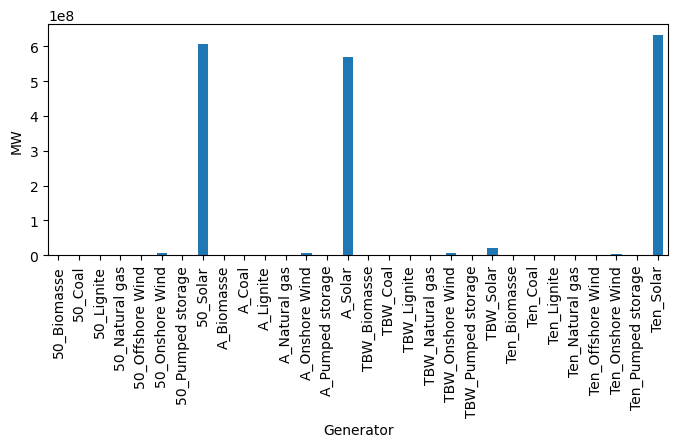

In [50]:
network.generators.p_nom_opt.plot.bar(ylabel="MW", figsize=(8, 3))

### 3)Lines snapshot

In [86]:
network.lines_t.p0

Line             0          1           2           3
snapshot                                             
0        -1700.000     0.0000 -1700.00000  1700.00000
1        -1700.000 -1700.0000     0.00000  1700.00000
2        -1700.000 -1700.0000     0.00000  1700.00000
3        -1700.000 -1700.0000     0.00000  1700.00000
4        -1700.000 -1700.0000     0.00000  1700.00000
5        -1700.000 -1700.0000     0.00000  1700.00000
6        -1700.000 -1700.0000     0.00000  1700.00000
7        -1700.000 -1700.0000     0.00000  1700.00000
8        -1700.000 -1700.0000     0.00000  1700.00000
9        -1700.000     0.0000 -1700.00000  1700.00000
10       -1700.000     0.0000 -1700.00000  1700.00000
11       -1700.000     0.0000 -1700.00000  1700.00000
12       -1700.000     0.0000 -1700.00000  1700.00000
13       -1700.000     0.0000 -1700.00000  1700.00000
14       -1700.000     0.0000 -1700.00000  1700.00000
15       -1700.000     0.0000 -1700.00000  1700.00000
16       -1700.000 -1700.0000     0.00000  1700.00000
17       -1700.000 -1700.0000     0.00000  1700.00000
18       -1700.000 -1700.0000     0.00000  1700.00000
19       -1700.000 -1700.0000     0.00000  1700.00000
20       -1700.000 -1700.0000     0.00000  1700.00000
21       -1700.000 -1700.0000     0.00000  1700.00000
22       -1700.000 -1700.0000     0.00000  1700.00000
23       -1700.000 -1700.0000     0.00000  1700.00000
24       -1700.000 -1700.0000     0.00000  1700.00000
25       -1700.000 -1700.0000     0.00000  1700.00000
26       -1700.000 -1700.0000     0.00000  1700.00000
27       -1700.000 -1700.0000     0.00000  1700.00000
28       -1700.000 -1700.0000     0.00000  1700.00000
29       -1700.000 -1700.0000     0.00000  1700.00000
30       -1700.000 -1700.0000     0.00000  1700.00000
31       -1700.000 -1700.0000     0.00000  1700.00000
32       -1700.000 -1700.0000     0.00000  1700.00000
33       -1700.000 -1700.0000     0.00000  1700.00000
34       -1700.000     0.0000 -1700.00000  1700.00000
35       -1700.000     0.0000 -1700.00000  1700.00000
36       -1700.000     0.0000 -1700.00000  1700.00000
37       -1700.000     0.0000 -1700.00000  1700.00000
38       -1700.000     0.0000 -1700.00000  1700.00000
39       -1700.000 -1700.0000     0.00000  1700.00000
40       -1700.000 -1700.0000     0.00000  1700.00000
41       -1700.000 -1700.0000     0.00000  1700.00000
42       -1700.000 -1700.0000     0.00000  1700.00000
43       -1700.000 -1700.0000     0.00000  1700.00000
44       -1700.000 -1700.0000     0.00000  1700.00000
45       -1700.000 -1700.0000     0.00000  1700.00000
46       -1700.000 -1700.0000     0.00000  1700.00000
47       -1700.000 -1700.0000     0.00000  1700.00000
48       -1700.000 -1700.0000     0.00000  1700.00000
49       -1700.000 -1700.0000     0.00000  1700.00000
50       -1700.000 -1700.0000     0.00000  1700.00000
51       -1700.000     0.0000 -1700.00000  1700.00000
52       -1700.000     0.0000 -1700.00000  1700.00000
53       -1700.000     0.0000 -1700.00000  1700.00000
54       -1700.000     0.0000 -1700.00000  1700.00000
55       -1700.000     0.0000 -1700.00000  1700.00000
56       -1700.000     0.0000 -1700.00000  1700.00000
57       -1700.000     0.0000 -1700.00000  1700.00000
58       -1700.000     0.0000 -1700.00000  1700.00000
59       -1700.000     0.0000 -1700.00000  1700.00000
60       -1700.000     0.0000 -1700.00000  1700.00000
61       -1700.000     0.0000 -1700.00000  1700.00000
62       -1700.000     0.0000 -1700.00000  1700.00000
63       -1700.000     0.0000 -1700.00000  1700.00000
64       -1700.000     0.0000 -1700.00000  1700.00000
65       -1700.000     0.0000 -1700.00000  1700.00000
66       -1700.000     0.0000 -1700.00000  1700.00000
67       -1700.000     0.0000 -1700.00000  1700.00000
68       -1700.000 -1700.0000     0.00000  1700.00000
69       -1700.000 -1700.0000     0.00000  1700.00000
70       -1700.000 -1700.0000     0.00000  1700.00000
71       -1700.000 -1700.0000     0.00000  1700.00000
72  

### 4)Gen assign

In [56]:
gen = network.generators.assign(g=network.generators_t.p.mean()).groupby(["bus", "carrier"]).g.sum()
gen

bus         carrier
50Hertz     biomass        0.000000
            coal           0.000000
            gas            0.000000
            hydro          0.000000
            lignite        0.000000
            solar       5766.188347
            wind        3860.668721
Amprion     biomass        0.000000
            coal           0.000000
            gas            0.000000
            hydro          0.000000
            lignite        0.000000
            solar      10017.451718
            wind        6298.132192
Tennet      biomass        0.000000
            coal           0.000000
            gas            0.000000
            hydro          0.000000
            lignite        0.000000
            solar       9886.478876
            wind        7097.245148
TransnetBW  biomass        0.000000
            coal           0.000000
            gas            0.000000
            hydro          0.147346
            lignite        0.000000
            solar       5413.778042
        

### 5)Flow

In [57]:
flow = pd.Series(10, index=network.branches().index)
flow

component  name    
Line       0           10
           1           10
           2           10
           3           10
Link       TBW_heat    10
           T_heat      10
           50_heat     10
           A_heat      10
dtype: int64

### 6)Geo. graph

c:\Users\82103\anaconda3\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning:

facecolor will have no effect as it has been defined as "never".



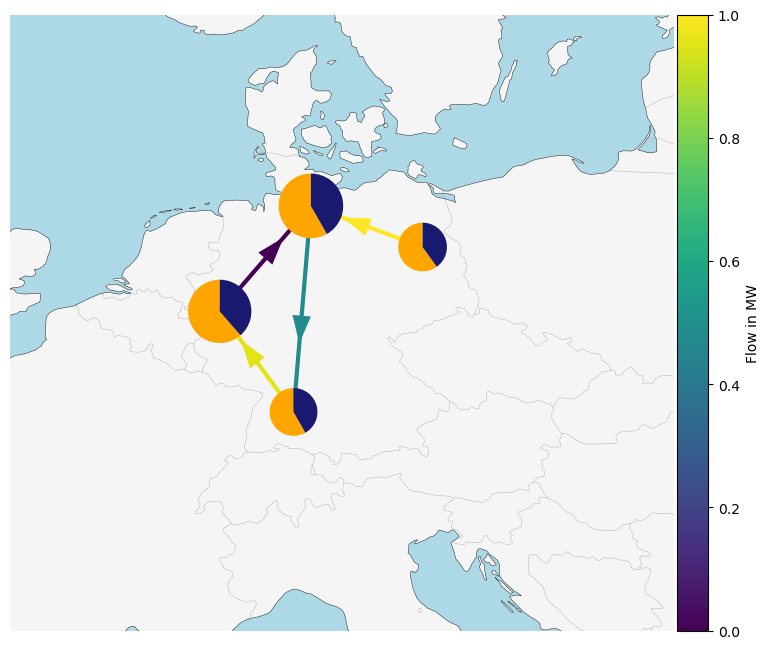

In [80]:
plot_graph=network.plot(
    bus_sizes=gen/20000,
    bus_colors={"biomass":"black","coal":"blue","gas":"pink","hydro":"cadetblue","lignite":"yellow","solar":"orange","wind":"midnightblue"},
    margin=1,
    line_widths=3,
    link_widths=0,
    flow=flow,
    color_geomap=True,
    projection=ccrs.EqualEarth(),
    line_colors=network.lines_t.p0.mean().abs(),
)
plt.colorbar(plot_graph[2], fraction=0.04, pad=0.004, label="Flow in MW")
plt.show()

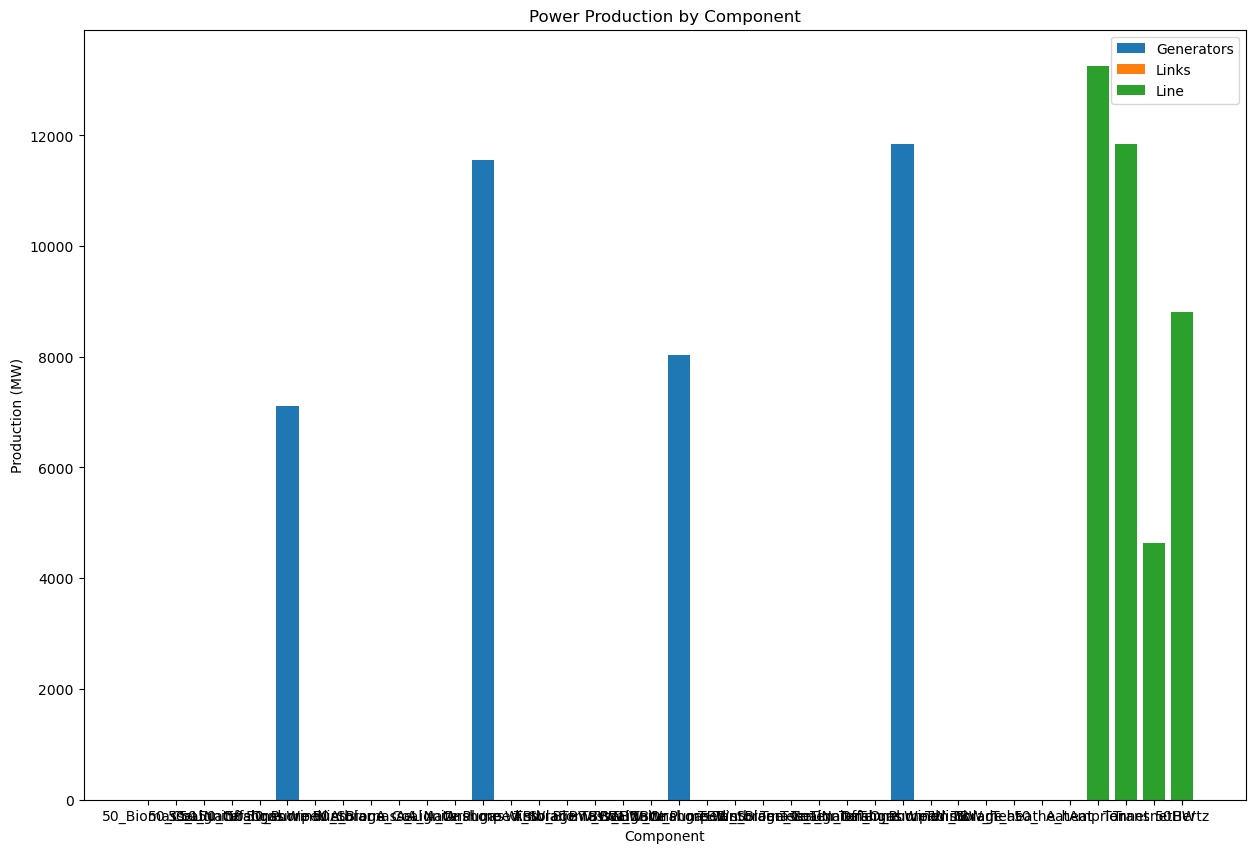

In [85]:
# Your DataFrame df
df = pd.concat(
    [
        network.generators_t.p.loc[0],
        network.links_t.p0.loc[0],
        network.loads_t.p.loc[0],
    ],
    keys=["Generators", "Links", "Line"],
    names=["Component", "index"],
).reset_index(name="Production")

# Plotting using PyPSA
fig, ax = plt.subplots(figsize=(15, 10))

# Plot generators
df_generators = df[df["Component"] == "Generators"]
ax.bar(df_generators["index"], df_generators["Production"], label="Generators")

# Plot links
df_links = df[df["Component"] == "Links"]
ax.bar(df_links["index"], df_links["Production"], label="Links")

# Plot loads
df_loads = df[df["Component"] == "Line"]
ax.bar(df_loads["index"], df_loads["Production"], label="Line")

# Customize the plot
ax.set_xlabel("Component")
ax.set_ylabel("Production (MW)")
ax.set_title("Power Production by Component")
ax.legend()

# Show the plot
plt.show()


## ADDITIONAL

### -)Storages

In [52]:
"""
def add_stores(filename, header):
    try:
        stores = pd.read_csv(filename, header=header)
    except pd.errors.EmptyDataError:
        print("The CSV file is empty.")
        return
        
    for index, row in stores.iterrows():
        network.add(
            "Store",
            name=row['name'],
            e_initial=row['e_initial'],
            e_nom=row['e_nom'],
            marginal_cost=row['marginal_cost'],
            bus=row['bus'],
            e_cyclic=row['e_cyclic'],
            e_nom_extendable=row['e_nom_extendable'],
        )
    return network.stores
"""

'\ndef add_stores(filename, header):\n    try:\n        stores = pd.read_csv(filename, header=header)\n    except pd.errors.EmptyDataError:\n        print("The CSV file is empty.")\n        return\n        \n    for index, row in stores.iterrows():\n        network.add(\n            "Store",\n            name=row[\'name\'],\n            e_initial=row[\'e_initial\'],\n            e_nom=row[\'e_nom\'],\n            marginal_cost=row[\'marginal_cost\'],\n            bus=row[\'bus\'],\n            e_cyclic=row[\'e_cyclic\'],\n            e_nom_extendable=row[\'e_nom_extendable\'],\n        )\n    return network.stores\n'

add_stores('stores.csv',0)

### -)Global constraints

In [53]:
#network.add("GlobalConstraint", "co2_limit", sense="<=", constant=0.0)

In [54]:
#network.lopf()